## Clustering using K-means
### Spark Foundations Task
#### Author: Akshat Agarwal

In [3]:
#importing numpy, pandas and sklearn.datasets library
import numpy as np
import pandas as pd
from sklearn import datasets

# Loading the given dataset
iris = datasets.load_iris()
iris_Df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_Df.head(10) # To See the first 10 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


C:\Users\aksha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


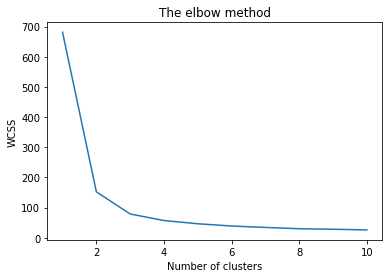

In [5]:
#import pylot to visualize the data
import matplotlib.pyplot as plt

# To Find the optimum number of clusters for classification

x = iris_Df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []# wcss means within cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

#### The optimum no. of clusters forms at the elbow of the graph. Because, within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.
#### Lets we choose the no. of clusters as three'3'.

In [8]:
# Applying kmeans clustering method to the given dataset
kMeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kMeans = kMeans.fit_predict(x)

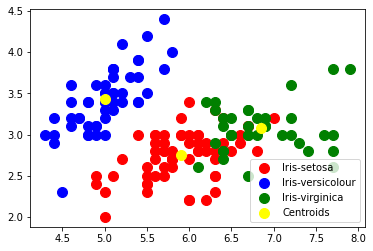

In [9]:
#Now, lets visualize these clusters
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kMeans == 0, 0], x[y_kMeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kMeans == 1, 0], x[y_kMeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kMeans == 2, 0], x[y_kMeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kMeans.cluster_centers_[:, 0], kMeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

#### Let we choose the no. of clusters as two'2'

In [10]:
# Applying kmeans clustering method to the given dataset
kMeans = KMeans(n_clusters = 2, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kMeans = kMeans.fit_predict(x)

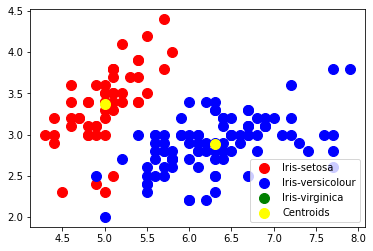

In [11]:
#Now, lets visualize these clusters
plt.scatter(x[y_kMeans == 0, 0], x[y_kMeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kMeans == 1, 0], x[y_kMeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kMeans == 2, 0], x[y_kMeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kMeans.cluster_centers_[:, 0], kMeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

#### This task concludes here